In [1]:
# Homepage adress
# -> http://www.sthda.com/english/wiki/factoextra-r-package-easy-multivariate-data-analyses-and-elegant-visualization
#install.packages("factoextra")
#install.packages("FactoMineR")
library(factoextra)
#library(FactoMineR)

필요한 패키지를 로딩중입니다: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



png 
  2

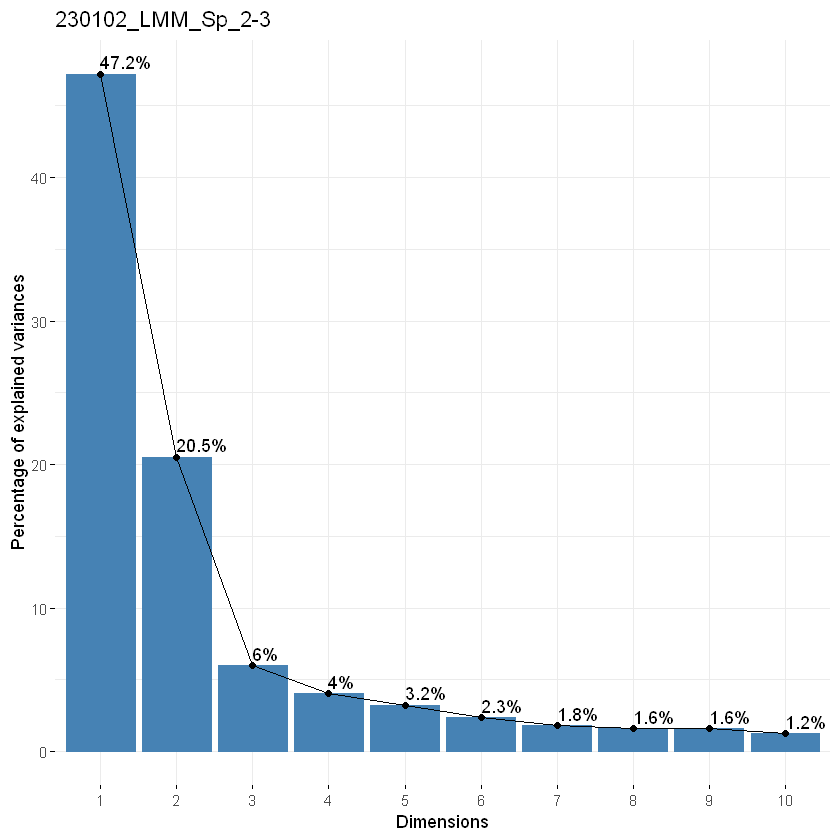

png 
  2

Warning message in get_col(col, k):
"Length of color vector was longer than the number of clusters - first k elements are used"
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


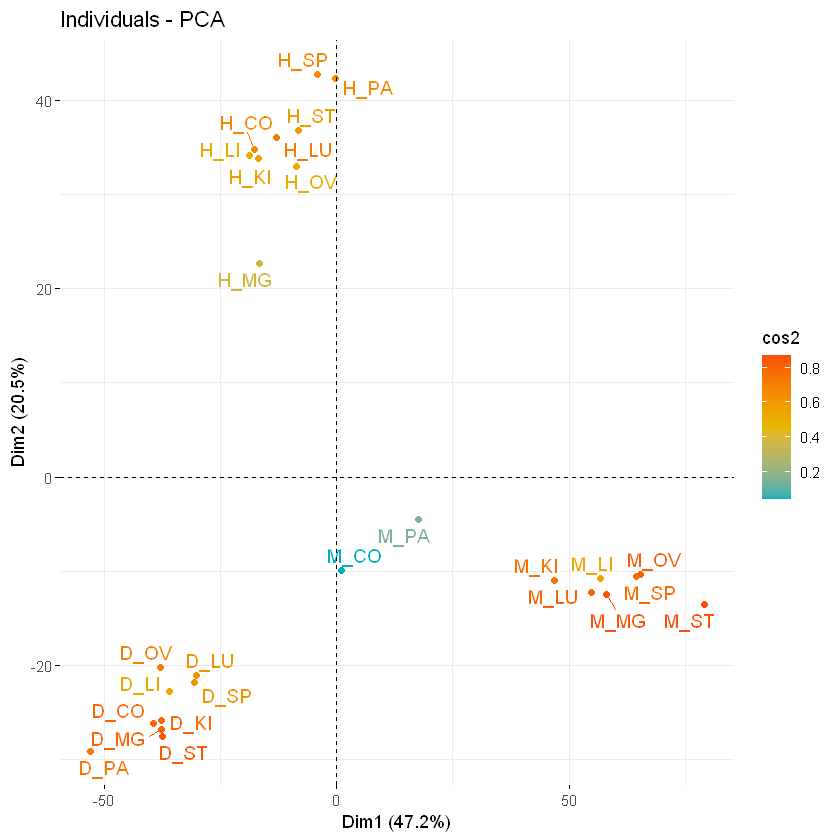

png 
  2

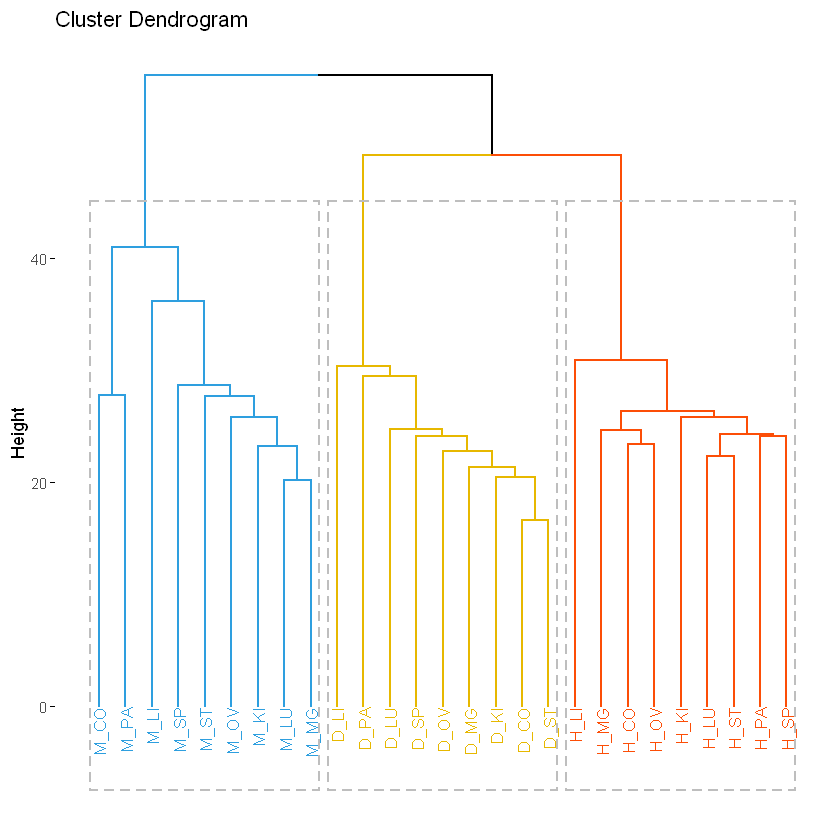

png 
  2

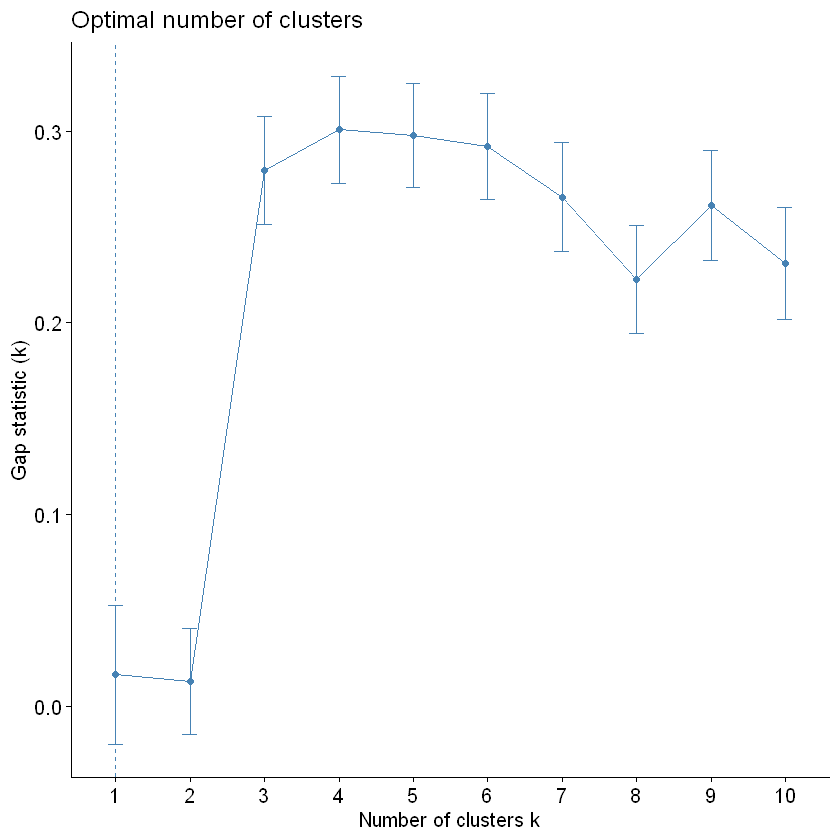

In [2]:
rm(list = ls())
#Change my working Dir
path = "C:/Users/thsrm/SynologyDrive/01_SNU_Projects/01_Main_projects/1803_Canine_Epi_Ref/01_Canine_EpiRef_180324/01_Results/00_RNA-seq/00_Revision_2211/230101_3species/LMM"
inFile_name = "230102_LMM_Sp_2-3.txt"

outFile_name = "230102_LMM_Sp_2-3"
Title = "230102_LMM_Sp_2-3"
#------------------------------------------------------------------------
# Read Data
#setwd(path)
inFile = read.table(inFile_name, sep="\t" ,header=T, row.names = 1)
#inFile = inFile[,-c(1:4)]
inFile_rowCol = t(inFile)

## Functions
##--------------------------------------------------------------------------
outPlot <- function(outName){
  #outFile_png = paste0(outName, ".png")
  outFile_pdf = paste0(outName, ".pdf")
  #dev.print(png, file = outFile_png,
  #  width=800,
  #  height=600)
  dev.print(pdf, file = outFile_pdf)
}

## PCA analysis -------------------------------------------------------------
res.pca <- prcomp(inFile_rowCol, scale = TRUE)
# Visualize eigenvalues/variances
fviz_screeplot(res.pca, addlabels = TRUE, main = Title)#, ylim = c(0, 50))

outName = paste0(outFile_name, "_var_percent")
outPlot(outName)
##--------------------------------------------------------------------------
fviz_pca_ind(res.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)
outName = paste0(outFile_name, "_PCA")
outPlot(outName)



## Dendrogram --------------------------------------------------------------
# Compute hierarchical clustering and cut into 4 clusters
res.dist <- factoextra::get_dist(inFile_rowCol, method = "euclidean")
res.hclust <- stats::hclust(res.dist, method = "average")

# Visualize
fviz_dend(res.hclust, rect = TRUE, cex = 0.7,
          k = 3,
          k_colors = c("#2E9FDF", "#E7B800", "#FC4E07", "#00AFBB", "darkorchid3"))

outName = paste0(outFile_name, "_Dend_kmean_euc_ave")
outPlot(outName)



## Optimal # of k ----------------------------------------------------------
# Optimal number of clusters for k-means
fviz_nbclust(inFile_rowCol, kmeans, method = "gap_stat",
             diss = dist(inFile_rowCol, method= "euclidean"),
             k.max = 10,
             nboot = 1000)
outName = paste0(outFile_name, "_optiman_k_n1000")
outPlot(outName)



